In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos de MNIST

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


## Preprocesamiento

In [3]:
train_images = train_images / 255
test_images = test_images / 255

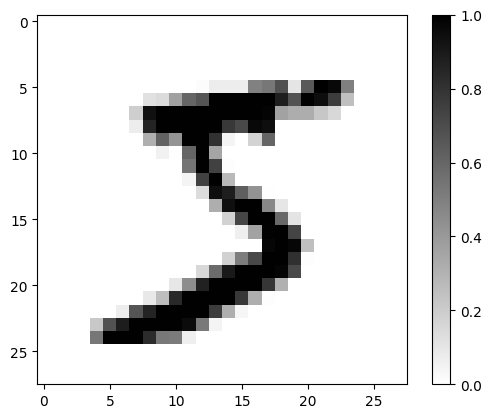

In [4]:
plt.imshow(train_images[0], cmap="binary")
plt.colorbar()
plt.show()

# Ejercicio 1

Entrenar un modelo MLP con Keras con el dataset MNIST. Llámalo `base_model` para utilizarlo luego.

In [5]:
def build_model(units, input_shape, output_dim, activation=tf.nn.tanh, optimizer="Adam", l1reg=0.0):
  input_layer = tf.keras.layers.Input(shape=input_shape)
  flatten = tf.keras.layers.Flatten()(input_layer)
  hidden = tf.keras.layers.Dense(units=units, activation=activation,
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(flatten)
  output = tf.keras.layers.Dense(units=output_dim, activation=tf.nn.softmax)(hidden)

  model = tf.keras.Model(inputs=input_layer, outputs=output)
  model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

In [6]:
units = 20
input_shape = train_images.shape[1:]
output_dim = len(np.unique(train_labels))
activation = tf.nn.tanh
optimizer = "Adam"
l1reg = 0.0

base_model = build_model(units, input_shape, output_dim, activation, optimizer, l1reg)
base_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
base_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8276 - loss: 0.6689 - val_accuracy: 0.9292 - val_loss: 0.2501
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9338 - loss: 0.2344 - val_accuracy: 0.9408 - val_loss: 0.2032
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9420 - loss: 0.1956 - val_accuracy: 0.9481 - val_loss: 0.1842
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9513 - loss: 0.1694 - val_accuracy: 0.9503 - val_loss: 0.1740
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1546 - val_accuracy: 0.9509 - val_loss: 0.1711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9591 - loss: 0.1436 - val_accuracy: 0.9528 - val_loss: 0.1678
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9610 - loss: 0.1353 - val_accuracy: 0.9532 - val_loss: 0.1623
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9631 - loss: 0.1260 - 

# Ejercicio 2

Entrenar un modelo MLP con Keras con el dataset MNIST utilizando regularización L1 en la capa de entrada. Llámalo `l1_model` para utilizarlo luego.

In [8]:
units = 20
input_shape = train_images.shape[1:]
output_dim = len(np.unique(train_labels))
activation = tf.nn.tanh
optimizer = "Adam"
l1reg = 0.01

l1_model = build_model(units, input_shape, output_dim, activation, optimizer, l1reg)
l1_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
l1_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7756 - loss: 2.1862 - val_accuracy: 0.8646 - val_loss: 0.9965
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8599 - loss: 0.9749 - val_accuracy: 0.8472 - val_loss: 0.9272
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8675 - loss: 0.8748 - val_accuracy: 0.8822 - val_loss: 0.7985
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8731 - loss: 0.8318 - val_accuracy: 0.8694 - val_loss: 0.8016
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8739 - loss: 0.8096 - val_accuracy: 0.8767 - val_loss: 0.7843
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8765 - loss: 0.7826 - val_accuracy: 0.8830 - val_loss: 0.7732
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8759 - loss: 0.7830 - val_accuracy: 0.8862 - val_loss: 0.7465
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8770 - loss: 0.7689 - 

# Ejercicio 3

Analiza los pesos de entrada del modelo `base_model`. Extrae la relevancia global basada en suma de pesos en valor absoluto y analízala. ¿Podrías analizar también en qué se está fijando cada neurona de la red?

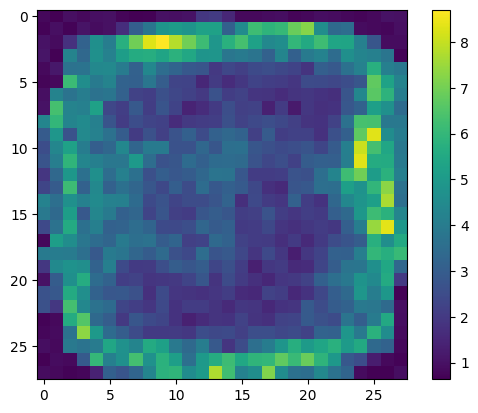

In [10]:
Wx_base = base_model.layers[2].weights[0].numpy()
Rx_weights_base = np.abs(Wx_base).sum(axis=1).reshape(28,28)
plt.imshow(Rx_weights_base)
plt.colorbar()
plt.show()

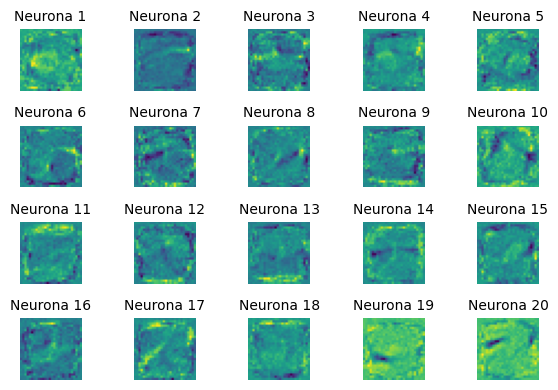

In [11]:
fig, axes = plt.subplots(4, 5, figsize=(6, 4))
axes = axes.flatten()

for neurona in range(Wx_base.shape[1]):
    ax = axes[neurona]
    ax.imshow(Wx_base[:, neurona].reshape(28, 28))
    ax.axis('off')  # Oculta los ejes
    ax.set_title(f'Neurona {neurona+1}', fontsize=10)

plt.tight_layout()
plt.show()

# Ejercicio 4

Analiza los pesos de entrada del modelo `l1_model`. Extrae la relevancia global basada en suma de pesos en valor absoluto y analízala. ¿Podrías comparar ahora en qué se está fijando cada neurona de la red?

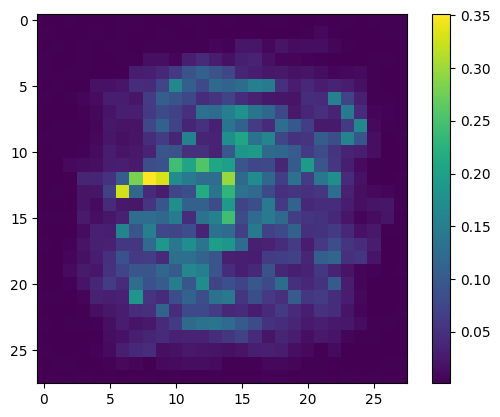

In [12]:
Wx_l1 = l1_model.layers[2].weights[0].numpy()
Rx_weights_l1 = np.abs(Wx_l1).sum(axis=1).reshape(28,28)
plt.imshow(Rx_weights_l1)
plt.colorbar()
plt.show()

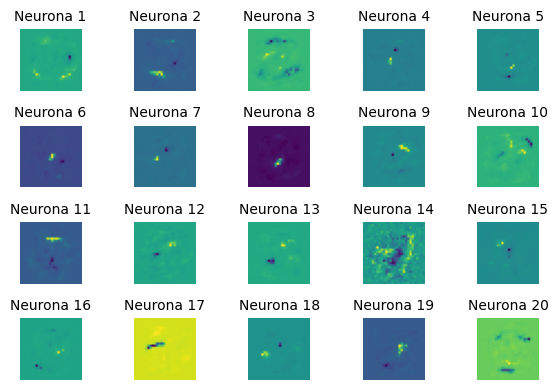

In [13]:
fig, axes = plt.subplots(4, 5, figsize=(6, 4))
axes = axes.flatten()

for neurona in range(Wx_l1.shape[1]):
    ax = axes[neurona]
    ax.imshow(Wx_l1[:, neurona].reshape(28, 28))
    ax.axis('off')  # Oculta los ejes
    ax.set_title(f'Neurona {neurona+1}', fontsize=10)

plt.tight_layout()
plt.show()

# Ejercicio 5

Calcula la relevancia del modelo para los 1000 primeros datos de entrenamiento de MNIST utilizando Gradient x Input. Asegúrate de que los datos están desordenados para poder hacer `[:1000]`, que es más cómodo. Prueba a visualizar algunas imágenes. Prueba a visualizar el promedio de la relevancia por clase. Discute los resultados.

In [14]:
X_train_small = train_images[:1000]
y_train_small = train_labels[:1000]

In [15]:
def gradient(model, X, y):
  X_tf = tf.convert_to_tensor(X, dtype=tf.float32)

  with tf.GradientTape() as tape:
    tape.watch(X_tf)
    y_pred = model(X_tf)

    # Seleccionamos la salida correspondiente a la clase real
    indices = tf.stack([tf.range(tf.shape(y_pred)[0]), y], axis=1)
    y_class = tf.gather_nd(y_pred, indices)

  grads = tape.gradient(y_class, X_tf)
  return grads.numpy()

In [16]:
def gradientxinput(model, X, y):
  return gradient(model, X, y) * X

In [17]:
Rx_gradxinput_base = gradientxinput(base_model, X_train_small, y_train_small)

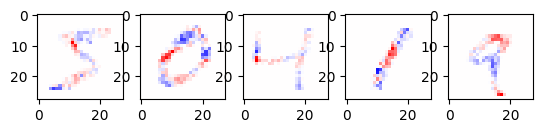

In [18]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  vmax = np.abs(Rx_gradxinput_base[i]).max()
  vmin = -vmax
  plt.imshow(Rx_gradxinput_base[i], cmap="bwr", vmin=vmin, vmax=vmax)
plt.show()

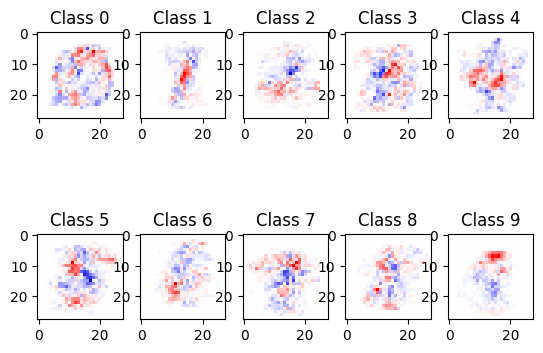

In [19]:
for c in range(10):
  plt.subplot(2, 5, c+1)
  vmax = np.abs(Rx_gradxinput_base[y_train_small==c].mean(axis=0)).max()
  vmin = -vmax
  plt.imshow(Rx_gradxinput_base[y_train_small==c].mean(axis=0), cmap="bwr", vmin=vmin, vmax=vmax)
  plt.title(f"Class {c}")
plt.show()

# Ejercicio 6

Calcula la relevancia del modelo para los 1000 primeros datos de entrenamiento de MNIST utilizando LRP. Asegúrate de que los datos están desordenados para poder hacer `[:1000]`, que es más cómodo. Prueba a visualizar algunas imágenes. Prueba a visualizar el promedio de la relevancia por clase. Discute los resultados.

In [20]:
def lrp(f):

    @tf.custom_gradient
    def f_custom_grad(x):
        output = f(x)

        def backward(dy):
            custom_grad = f(x)/x
            return dy * custom_grad

        return output, backward
    return f_custom_grad

In [21]:
def build_model_lrp(units, input_shape, output_dim, activation=tf.nn.tanh, optimizer="Adam", l1reg=0.0):
  input_layer = tf.keras.layers.Input(shape=input_shape)
  flatten = tf.keras.layers.Flatten()(input_layer)
  hidden = tf.keras.layers.Dense(units=units, activation=lrp(activation),
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(flatten)
  output = tf.keras.layers.Dense(units=output_dim, activation=tf.nn.softmax)(hidden)

  model = tf.keras.Model(inputs=input_layer, outputs=output)
  model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

In [22]:
base_model.save_weights("base.weights.h5")
model_lrp = build_model_lrp(units, input_shape, output_dim, activation, optimizer, l1reg)
model_lrp.load_weights("base.weights.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
Rx_lrp_base = gradientxinput(model_lrp, X_train_small, y_train_small)

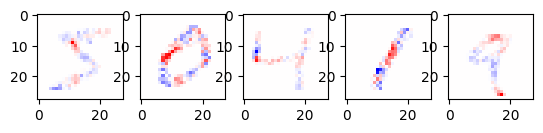

In [24]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  vmax = np.abs(Rx_lrp_base[i]).max()
  vmin = -vmax
  plt.imshow(Rx_lrp_base[i], cmap="bwr", vmin=vmin, vmax=vmax)
plt.show()

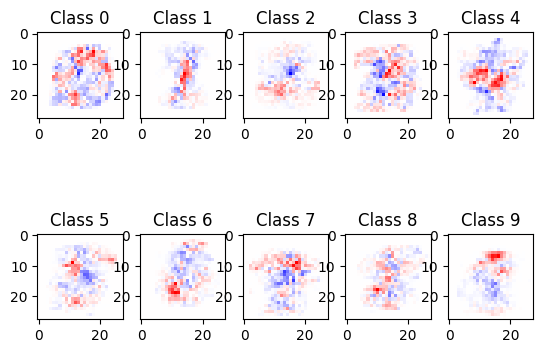

In [25]:
for c in range(10):
  plt.subplot(2, 5, c+1)
  vmax = np.abs(Rx_lrp_base[y_train_small==c].mean(axis=0)).max()
  vmin = -vmax
  plt.imshow(Rx_lrp_base[y_train_small==c].mean(axis=0), cmap="bwr", vmin=vmin, vmax=vmax)
  plt.title(f"Class {c}")
plt.show()

# Ejercicio 7

¿Qué método de explicabilidad de los discutidos en los ejercicios anteriores es mejor? Justifica tu respuesta.

In [56]:
from tqdm import tqdm
def epc(X, y, model, Rx, local=False, verbose=False):
  at = Rx.shape[-1]
  m = model.evaluate(X.reshape(-1, 28, 28), y, batch_size=len(X), verbose=False)[-1]
  epc_all = []
  iterador_at = tqdm(range(0, at, 8)) if verbose else range(0, at, 8) # Voy de 8 en 8 para acelerar
  if not local: # Si es global
    for i in iterador_at:
        ar = at - i
        factor1 = (at - ar) / at

        umbral = np.sort(Rx[0])[i] # Usamos el mismo umbral para todo el dataset

        # Prueba 1
        X_prueba1 = X.copy()
        X_prueba1[Rx <= umbral] = 0
        mmas = model.evaluate(X_prueba1.reshape(-1, 28, 28), y, batch_size=len(X_prueba1), verbose=False)[-1]

        # Prueba 2
        X_prueba2 = X.copy()
        X_prueba2[Rx >= umbral] = 0
        mmenos = model.evaluate(X_prueba2.reshape(-1, 28, 28), y, batch_size=len(X_prueba2), verbose=False)[-1]

        factor2 = (mmas - mmenos) / m

        epc = factor1 * factor2
        epc_all.append(epc)

  else: # Si es local
    for i in iterador_at:
        ar = at - i
        factor1 = (at - ar) / at

        # Prueba 1
        X_prueba1 = X.copy()
        for j, (x, r) in enumerate(zip(X, Rx)): # Por cada instancia x hay una relevancia r
            umbral = np.sort(r)[i] # y tenemos que usar esa r para definir el umbral
            X_prueba1[j, r <= umbral] = 0
        mmas = model.evaluate(X_prueba1.reshape(-1, 28, 28), y, batch_size=len(X_prueba1), verbose=False)[-1]

        # Prueba 2
        X_prueba2 = X.copy()
        for j, (x, r) in enumerate(zip(X, Rx)): # Lo mismo aquí con la prueba 2
            umbral = np.sort(r)[i]
            X_prueba2[j, r >= umbral] = 0
        mmenos = model.evaluate(X_prueba2.reshape(-1, 28, 28), y, batch_size=len(X_prueba2), verbose=False)[-1]

        factor2 = (mmas - mmenos) / m

        epc = factor1 * factor2
        epc_all.append(epc)

  return np.array(epc_all)

In [52]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
X_train_small_flat = X_train_small.reshape(X_train_small.shape[0], -1)
Rx_weights_base_flat = Rx_weights_base.reshape(-1)[None, :]
Rx_lrp_base_flat = Rx_lrp_base.reshape(-1, 28*28)
Rx_gradxinput_base_flat = Rx_gradxinput_base.reshape(-1, 28*28)

In [57]:
epc_weights_rl = epc(train_images_flat, train_labels, base_model, np.repeat(Rx_weights_base_flat, train_images.shape[0], axis=0), verbose=True)
epc_gradxinput_rl = epc(X_train_small_flat, y_train_small, base_model, Rx_gradxinput_base_flat, verbose=True, local=True)
epc_lrp_rl = epc(X_train_small_flat, y_train_small, base_model, Rx_lrp_base_flat, verbose=True, local=True)

100%|██████████| 98/98 [00:18<00:00,  5.16it/s]


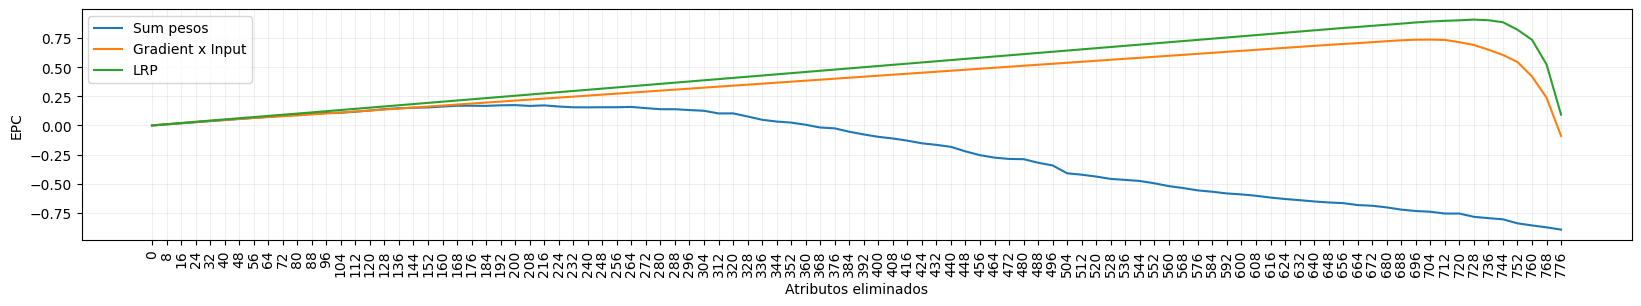

In [58]:
plt.figure(figsize=(20, 3))
plt.plot(epc_weights_rl, label="Sum pesos")
plt.plot(epc_gradxinput_rl, label="Gradient x Input")
plt.plot(epc_lrp_rl, label="LRP")
plt.xlabel("Atributos eliminados")
plt.xticks(range(len(epc_weights_rl)), range(0, 28*28, 8), rotation=90)
plt.legend()
plt.ylabel("EPC")
plt.grid(alpha=0.2)

# Ejercicio 8

Entrena una CNN sencilla con el dataset MNIST. Llámalo `cnn_model` para poder utilizarlo luego.

In [30]:
def build_model_cnn(units, input_shape, output_dim, activation=tf.nn.tanh, optimizer="Adam", l1reg=0.0):
  input_layer = tf.keras.layers.Input(shape=input_shape)
  conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(input_layer)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(pool1)
  pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
  flatten = tf.keras.layers.Flatten()(pool2)
  hidden = tf.keras.layers.Dense(units=units, activation=activation,
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(flatten)
  output = tf.keras.layers.Dense(units=output_dim, activation=tf.nn.softmax)(hidden)

  model = tf.keras.Model(inputs=input_layer, outputs=output)
  model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

In [31]:
cnn_model = build_model_cnn(units, (28, 28, 1), output_dim, activation, optimizer)
cnn_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │        32,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,046 (199.40 KB)

 Trainable params: 51,046 (199.40 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
cnn_model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8941 - loss: 0.4046 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9840 - loss: 0.0568 - val_accuracy: 0.9873 - val_loss: 0.0413
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9884 - loss: 0.0388 - val_accuracy: 0.9907 - val_loss: 0.0317


# Ejercicio 9

Calcula la relevancia del modelo para los 1000 primeros datos de entrenamiento de MNIST utilizando Gradient x Input y LRP. Asegúrate de que los datos están desordenados para poder hacer `[:1000]`, que es más cómodo. Prueba a visualizar algunas imágenes. Prueba a visualizar el promedio de la relevancia por clase. Discute los resultados.

In [33]:
def build_model_cnn_lrp(units, input_shape, output_dim, activation=tf.nn.tanh, optimizer="Adam", l1reg=0.0):
  input_layer = tf.keras.layers.Input(shape=input_shape)
  conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=lrp(tf.nn.relu),
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(input_layer)
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=lrp(tf.nn.relu),
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(pool1)
  pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
  flatten = tf.keras.layers.Flatten()(pool2)
  hidden = tf.keras.layers.Dense(units=units, activation=lrp(activation),
                                 kernel_regularizer=tf.keras.regularizers.l1(l1reg))(flatten)
  output = tf.keras.layers.Dense(units=output_dim, activation=tf.nn.softmax)(hidden)

  model = tf.keras.Model(inputs=input_layer, outputs=output)
  model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

In [34]:
cnn_model.save_weights("cnn.weights.h5")
cnn_model_lrp = build_model_cnn_lrp(units, (28, 28, 1), output_dim, activation, optimizer, l1reg)
cnn_model_lrp.load_weights("cnn.weights.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
Rx_gradxinput_cnn = gradientxinput(cnn_model, X_train_small, y_train_small)
Rx_lrp_cnn = gradientxinput(cnn_model_lrp, X_train_small, y_train_small)

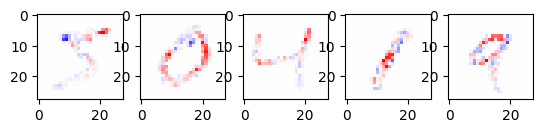

In [36]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  vmax = np.abs(Rx_lrp_cnn[i]).max()
  vmin = -vmax
  plt.imshow(Rx_lrp_cnn[i], cmap="bwr", vmin=vmin, vmax=vmax)
plt.show()

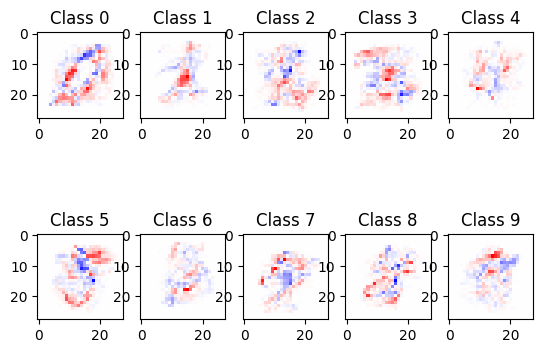

In [37]:
for c in range(10):
  plt.subplot(2, 5, c+1)
  vmax = np.abs(Rx_lrp_cnn[y_train_small==c].mean(axis=0)).max()
  vmin = -vmax
  plt.imshow(Rx_lrp_cnn[y_train_small==c].mean(axis=0), cmap="bwr", vmin=vmin, vmax=vmax)
  plt.title(f"Class {c}")
plt.show()

# Ejercicio 10

¿Qué método de explicabilidad de los discutidos en el ejercicio anterior es mejor? Justifica tu respuesta.

In [59]:
Rx_lrp_cnn_flat = Rx_lrp_cnn.reshape(-1, 28*28)
Rx_gradxinput_cnn_flat = Rx_gradxinput_cnn.reshape(-1, 28*28)

In [60]:
epc_gradxinput_cnn = epc(X_train_small_flat, y_train_small, cnn_model, Rx_gradxinput_cnn_flat, verbose=True, local=True)
epc_lrp_cnn = epc(X_train_small_flat, y_train_small, cnn_model, Rx_lrp_cnn_flat, verbose=True, local=True)

100%|██████████| 98/98 [00:50<00:00,  1.94it/s]


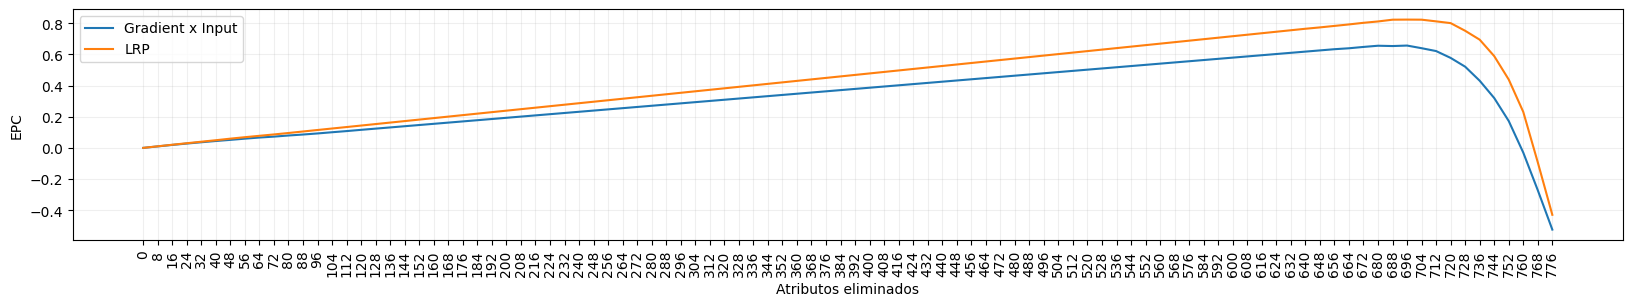

In [61]:
plt.figure(figsize=(20, 3))
plt.plot(epc_gradxinput_cnn, label="Gradient x Input")
plt.plot(epc_lrp_cnn, label="LRP")
plt.xlabel("Atributos eliminados")
plt.xticks(range(len(epc_gradxinput_cnn)), range(0, 28*28, 8), rotation=90)
plt.legend()
plt.ylabel("EPC")
plt.grid(alpha=0.2)